# Used Cars

### Import the required libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Code to display all columns of the dataset

In [3]:
pd.set_option('display.max_columns', None)

### Creating a Backup DataFrame

In [4]:
df = pd.read_csv('used_cars_data.csv')

In [5]:
backup_df = pd.read_csv('used_cars_data.csv')

In [6]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Overview of the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
rows , columns = df.shape

#### No of entries of the dataset

In [10]:
rows

7253

#### No of features in the dataset

In [11]:
columns

14

### No of unique values in each Feature

In [12]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

### Frequency of each Unique value in each Feature

In [13]:
for i in df.columns:
    
    print('_'* 100)
    print(f"Feature {i}")
    print(df[i].value_counts())

____________________________________________________________________________________________________
Feature S.No.
0       1
4818    1
4844    1
4843    1
4842    1
       ..
2413    1
2412    1
2411    1
2410    1
7252    1
Name: S.No., Length: 7253, dtype: int64
____________________________________________________________________________________________________
Feature Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
____________________________________________________________________________________________________
Feature 

## Dropping Unwanted columns 

In [14]:
drop_columns = ['S.No.' , 'Name']

In [15]:
df.drop(drop_columns,inplace = True ,axis = 1)

In [16]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Handling missing Entries

In [17]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [18]:
df['Engine'] = df['Engine'].str.replace(" CC","").astype(float)


In [19]:
df['Power'].value_counts()

74 bhp       280
98.6 bhp     166
73.9 bhp     152
140 bhp      142
null bhp     129
            ... 
421 bhp        1
89.75 bhp      1
387.3 bhp      1
226.6 bhp      1
241.6 bhp      1
Name: Power, Length: 386, dtype: int64

#### There is a class called 'null' which are missing values

In [20]:
df['Power'] = df['Power'].str.replace('null bhp' ,'0 bhp')

In [21]:
df['Power'].value_counts()

74 bhp       280
98.6 bhp     166
73.9 bhp     152
140 bhp      142
0 bhp        129
            ... 
421 bhp        1
89.75 bhp      1
387.3 bhp      1
226.6 bhp      1
241.6 bhp      1
Name: Power, Length: 386, dtype: int64

In [22]:
df['Power'] = df['Power'].str.replace(' bhp','').astype(float)

In [23]:
df['Power'].value_counts()

74.00     280
98.60     166
73.90     152
140.00    142
88.50     132
         ... 
340.00      1
80.90       1
68.10       1
301.73      1
241.60      1
Name: Power, Length: 384, dtype: int64

In [24]:
df['Power'].replace(0,np.nan,inplace = True)

In [25]:
Correct_Mileage= []
for i in df['Mileage']:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
    else:
        i = np.nan
        Correct_Mileage.append(i)

In [26]:
df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [27]:
len(df),len(Correct_Mileage)

(7253, 7253)

In [28]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,NaN,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,NaN,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,NaN,17.74


In [29]:
df['Mileage'] = Correct_Mileage


In [30]:
df['Mileage'].isnull().sum()

2

## Filling missing Values

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   float64
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [32]:
df.nunique()

Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               164
Engine                150
Power                 383
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [33]:
df['Mileage'].fillna(df['Mileage'].mean(),inplace = True)

In [34]:
df['Engine'].fillna(df['Engine'].mean(),inplace = True)

In [35]:
df['Power'].fillna(df['Power'].mean(),inplace = True)

In [36]:
df['Seats'].fillna(df['Seats'].mode(),inplace = True)

In [37]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,NaN,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,NaN,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,NaN,17.74


### Separating Categorical and Continuous features

In [38]:
features = df.columns
print(features)

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price'],
      dtype='object')


##### I choose 25 as the unique value count as threshold to be a categorical feature

In [39]:
categorical_features = []
numerical_features = []
for feature in features:
    print(feature)
    n = len(df[feature].unique())
    if n <= 25:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

Location
Year
Kilometers_Driven
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
New_Price
Price


In [40]:
numerical_features

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']

In [41]:
categorical_features


['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

#### The remaining features are considered as Contiunous Features

## Separation






|  Categorical Features | Numerical Features |
|-----------|-------|
|  Location   |   Kilometers_Driven  |
|  Year |  Mileage   |
|  Fuel_Type  |  Power   |
|Transmission | New_Price |
|Owner_Type |Price |
|Seats | Engine  |
| |     |


## Encoding Features

In [42]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder = LabelEncoder()

In [43]:
for i in categorical_features:
    
    feature_values = df[i].values.reshape(-1, 1)
    print(df[i])
    df[i] = encoder.fit_transform(feature_values)
    

0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
7248     Hyderabad
7249        Mumbai
7250       Kolkata
7251          Pune
7252         Kochi
Name: Location, Length: 7253, dtype: object
0       2010
1       2015
2       2011
3       2012
4       2013
        ... 
7248    2011
7249    2015
7250    2012
7251    2013
7252    2014
Name: Year, Length: 7253, dtype: int64
0          CNG
1       Diesel
2       Petrol
3       Diesel
4       Diesel
         ...  
7248    Diesel
7249    Petrol
7250    Diesel
7251    Petrol
7252    Diesel
Name: Fuel_Type, Length: 7253, dtype: object
0          Manual
1          Manual
2          Manual
3          Manual
4       Automatic
          ...    
7248       Manual
7249    Automatic
7250       Manual
7251    Automatic
7252    Automatic
Name: Transmission, Length: 7253, dtype: object
0        First
1        First
2        First
3        First
4       Second
         ...  
7248     First
7249

c:\Users\iQube_VR\anaconda3\envs\gpu\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,9,13,72000,0,1,0,37.24,998.0,58.16,3,NaN,1.75
1,10,18,41000,1,1,0,19.60,1582.0,126.20,3,NaN,12.50
2,2,14,46000,4,1,0,18.00,1199.0,88.70,3,8.61 Lakh,4.50
3,2,15,87000,1,1,0,20.70,1248.0,88.76,5,NaN,6.00
4,3,16,40670,1,0,2,15.00,1968.0,140.80,3,NaN,17.74


## Features New_price and Price has null values

### Considering Non-null Values only

In [45]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                1234
dtype: int64

In [46]:
df_filtered = df[df.notnull().all(axis=1)]


In [47]:
df_filtered

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,14,46000,4,1,0,18.0,1199.0,88.70,3,8.61 Lakh,4.50
7,9,19,36000,1,0,0,11.3,2755.0,171.50,6,21 Lakh,17.50
10,7,21,25692,4,1,0,21.5,1462.0,103.25,3,10.65 Lakh,9.95
15,4,17,110000,1,1,0,13.0,2477.0,175.56,5,32.01 Lakh,15.00
20,7,17,32982,1,0,0,22.6,1995.0,190.00,3,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...
5999,2,19,10000,4,1,0,17.5,1193.0,88.70,3,7.77 Lakh,4.00
6002,9,14,38000,4,1,0,16.0,1598.0,103.50,3,11.91 Lakh,3.25
6005,10,19,37208,1,1,0,24.0,1248.0,88.50,3,9.93 Lakh,7.43
6010,4,16,33746,4,1,0,18.0,1198.0,86.80,3,6.63 Lakh,3.20


In [48]:
df_filtered['New_Price']

2        8.61 Lakh
7          21 Lakh
10      10.65 Lakh
15      32.01 Lakh
20      47.87 Lakh
           ...    
5999     7.77 Lakh
6002    11.91 Lakh
6005     9.93 Lakh
6010     6.63 Lakh
6014     7.88 Lakh
Name: New_Price, Length: 824, dtype: object

In [49]:
list = []

for i in df_filtered['New_Price']:
    if " Cr" in i:
        i = str(i).replace(' Cr' , '')
        i = float(i) * 100
        list.append(round(i,2))
    elif str(i).endswith(' Lakh'):
        i = str(i).replace(' Lakh' , '')
        i = float(i)
        list.append(round(i,2))
    else:
        list.append(np.nan)
list

[8.61,
 21.0,
 10.65,
 32.01,
 47.87,
 10.57,
 12.33,
 11.12,
 23.64,
 18.64,
 19.34,
 49.14,
 11.81,
 16.65,
 6.67,
 6.45,
 6.41,
 27.0,
 5.13,
 54.43,
 9.51,
 9.96,
 14.44,
 4.53,
 95.04,
 13.49,
 128.0,
 60.88,
 7.39,
 69.47,
 8.78,
 12.74,
 10.52,
 11.98,
 8.54,
 33.58,
 9.12,
 5.29,
 44.28,
 20.74,
 11.74,
 25.52,
 14.07,
 95.13,
 8.34,
 8.34,
 8.85,
 25.4,
 16.67,
 79.43,
 6.62,
 104.0,
 9.12,
 58.67,
 28.37,
 4.48,
 72.64,
 36.15,
 44.59,
 12.0,
 14.65,
 53.72,
 33.91,
 60.88,
 12.51,
 9.74,
 95.38,
 60.59,
 44.28,
 11.28,
 11.48,
 11.26,
 43.65,
 62.07,
 86.97,
 100.0,
 4.74,
 14.84,
 49.49,
 48.18,
 12.34,
 15.38,
 19.21,
 22.95,
 11.15,
 10.32,
 28.05,
 59.77,
 15.86,
 19.43,
 10.65,
 42.12,
 16.95,
 15.45,
 7.87,
 4.7,
 15.02,
 12.56,
 11.33,
 26.45,
 10.34,
 7.46,
 11.85,
 10.41,
 5.57,
 42.48,
 16.04,
 9.1,
 7.65,
 13.74,
 5.72,
 21.33,
 78.76,
 10.34,
 4.29,
 10.04,
 11.67,
 25.52,
 8.56,
 27.0,
 4.78,
 6.14,
 7.3,
 4.37,
 4.98,
 15.29,
 24.26,
 75.12,
 9.53,
 34.6,
 26.4

In [50]:
df_filtered['New_Price'] = list.copy()

c:\Users\iQube_VR\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_filtered.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,14,46000,4,1,0,18.0,1199.0,88.70,3,8.61,4.50
7,9,19,36000,1,0,0,11.3,2755.0,171.50,6,21.00,17.50
10,7,21,25692,4,1,0,21.5,1462.0,103.25,3,10.65,9.95
15,4,17,110000,1,1,0,13.0,2477.0,175.56,5,32.01,15.00
20,7,17,32982,1,0,0,22.6,1995.0,190.00,3,47.87,18.55


In [52]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 2 to 6014
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           824 non-null    int32  
 1   Year               824 non-null    int64  
 2   Kilometers_Driven  824 non-null    int64  
 3   Fuel_Type          824 non-null    int32  
 4   Transmission       824 non-null    int32  
 5   Owner_Type         824 non-null    int32  
 6   Mileage            824 non-null    float64
 7   Engine             824 non-null    float64
 8   Power              824 non-null    float64
 9   Seats              824 non-null    int64  
 10  New_Price          824 non-null    float64
 11  Price              824 non-null    float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 70.8 KB


In [53]:
df_filtered['New_Price'].unique()

array([  8.61,  21.  ,  10.65,  32.01,  47.87,  10.57,  12.33,  11.12,
        23.64,  18.64,  19.34,  49.14,  11.81,  16.65,   6.67,   6.45,
         6.41,  27.  ,   5.13,  54.43,   9.51,   9.96,  14.44,   4.53,
        95.04,  13.49, 128.  ,  60.88,   7.39,  69.47,   8.78,  12.74,
        10.52,  11.98,   8.54,  33.58,   9.12,   5.29,  44.28,  20.74,
        11.74,  25.52,  14.07,  95.13,   8.34,   8.85,  25.4 ,  16.67,
        79.43,   6.62, 104.  ,  58.67,  28.37,   4.48,  72.64,  36.15,
        44.59,  12.  ,  14.65,  53.72,  33.91,  12.51,   9.74,  95.38,
        60.59,  11.28,  11.48,  11.26,  43.65,  62.07,  86.97, 100.  ,
         4.74,  14.84,  49.49,  48.18,  12.34,  15.38,  19.21,  22.95,
        11.15,  10.32,  28.05,  59.77,  15.86,  19.43,  42.12,  16.95,
        15.45,   7.87,   4.7 ,  15.02,  12.56,  11.33,  26.45,  10.34,
         7.46,  11.85,  10.41,   5.57,  42.48,  16.04,   9.1 ,   7.65,
        13.74,   5.72,  21.33,  78.76,   4.29,  10.04,  11.67,   8.56,
      

## Correaltion matrix

In [54]:
for i in df_filtered.columns:
    
    if i != 'New_Price':
        correlation = df_filtered[i].corr(df_filtered['New_Price'])
        print("_"*100)
        print()
        print(f"Correlation between {i} and New_Price:", correlation)
        print()


____________________________________________________________________________________________________

Correlation between Location and New_Price: -0.043275038909661126

____________________________________________________________________________________________________

Correlation between Year and New_Price: -0.021415724296098206

____________________________________________________________________________________________________

Correlation between Kilometers_Driven and New_Price: -0.007747221082658813

____________________________________________________________________________________________________

Correlation between Fuel_Type and New_Price: -0.31245186196252983

____________________________________________________________________________________________________

Correlation between Transmission and New_Price: -0.5865758160728369

____________________________________________________________________________________________________

Correlation between Owner_Type and New_Price: 

### The features Kilometers_Driven and Seats has relatively very low correlation

In [55]:
df_filtered.drop(columns = ['Seats' , 'Price'],axis = 1 , inplace = True)

c:\Users\iQube_VR\anaconda3\envs\gpu\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
X = df_filtered.drop('New_Price',axis = 1)
y = df_filtered['New_Price']
X.shape

(824, 9)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (659, 9)
Shape of X_test: (165, 9)
Shape of y_train: (659,)
Shape of y_test: (165,)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_linear = linear_reg_model.predict(X_test)

# Calculating Mean Squared Error for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error for Linear Regression:", mse_linear)

# Logistic Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Creating and fitting the Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = random_forest_model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Logistic regression:", mse)



Mean Squared Error for Linear Regression: 218.0970614136712
Mean Squared Error for Logistic regression: 62.969210460606064


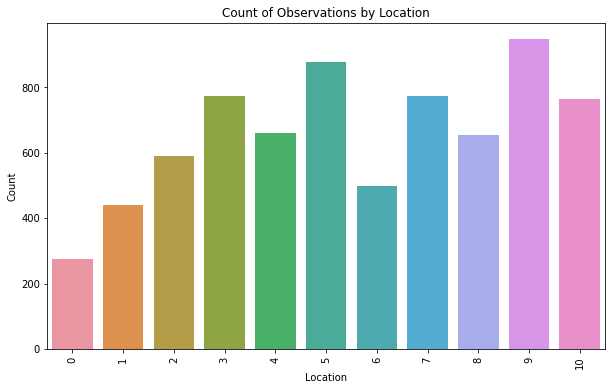

In [59]:
plt.figure(figsize=(10, 6))  

sns.countplot(df, x="Location")
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Observations by Location')
plt.xticks(rotation=90)
plt.show()

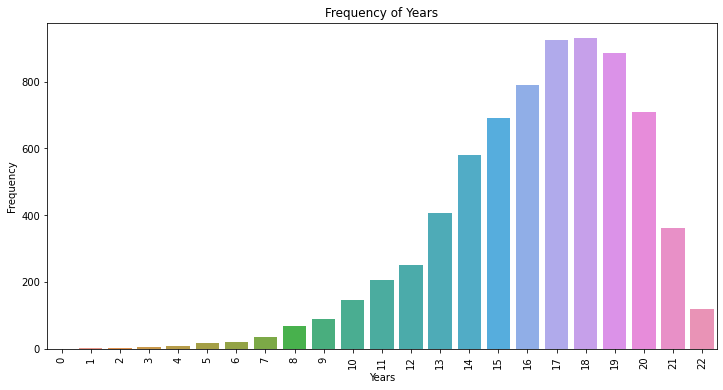

In [60]:

plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x="Year" , order = sorted(df['Year'].unique()))

plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency of Years')

plt.xticks(rotation=90)

plt.show()


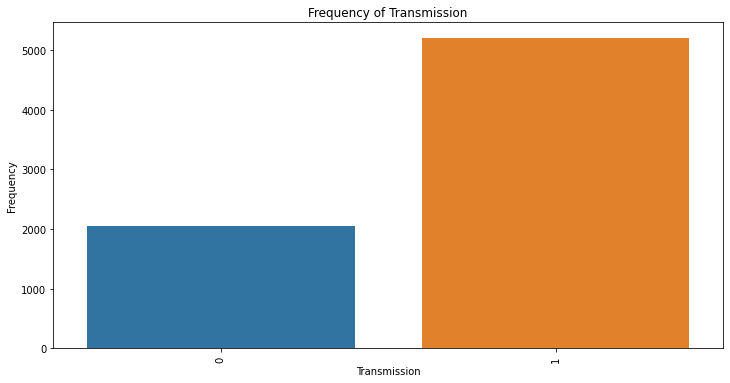

In [61]:

plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x="Transmission")

plt.xlabel('Transmission')
plt.ylabel('Frequency')
plt.title('Frequency of Transmission')

plt.xticks(rotation=90)

plt.show()


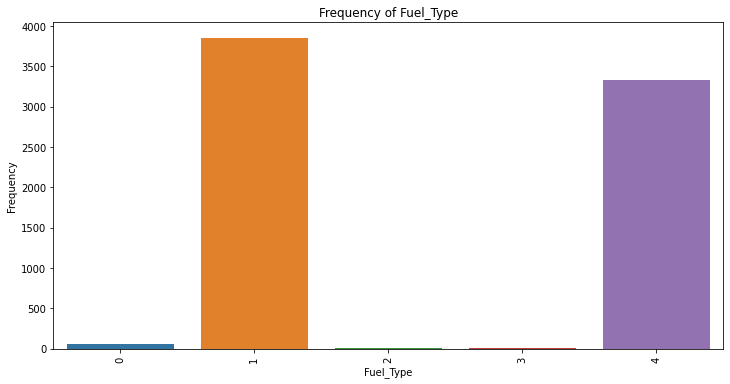

In [62]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x="Fuel_Type")

plt.xlabel('Fuel_Type')
plt.ylabel('Frequency')
plt.title('Frequency of Fuel_Type')

plt.xticks(rotation=90)

plt.show()


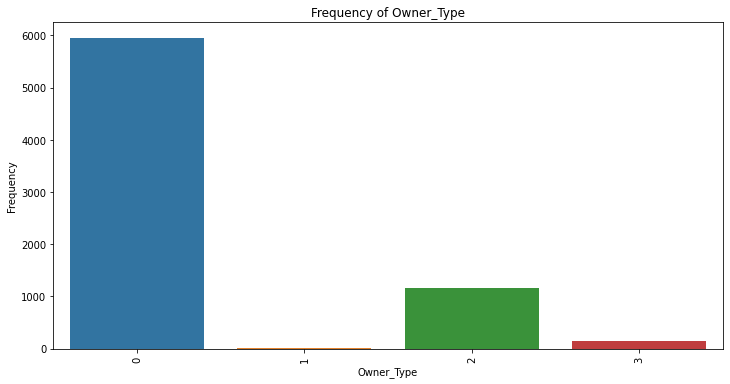

In [63]:
plt.figure(figsize=(12, 6))  
sns.countplot(data=df, x="Owner_Type")

plt.xlabel('Owner_Type')
plt.ylabel('Frequency')
plt.title('Frequency of Owner_Type')

plt.xticks(rotation=90)

plt.show()


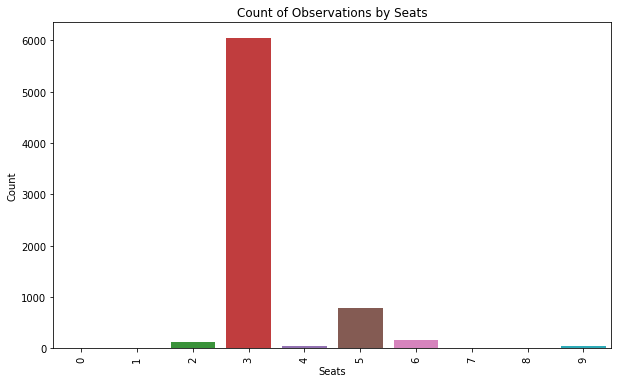

In [64]:
plt.figure(figsize=(10, 6))  

sns.countplot(df, x="Seats")
plt.xlabel('Seats')
plt.ylabel('Count')
plt.title('Count of Observations by Seats')
plt.xticks(rotation=90)
plt.show()

In [67]:
import subprocess

# Replace 'ann.ipynb' with the name of your notebook file
notebook_filename = 'ann.ipynb'

# Execute the command to convert notebook to PDF using nbconvert
subprocess.run(['jupyter', 'nbconvert', '--to', 'pdf', notebook_filename])


CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'pdf', 'ann.ipynb'], returncode=1)